### Triangle coffee sales and weather

First lets load the daily sales data (from a square daily sales report )

In [21]:
# install.packages('weatherData')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(dplyr); library(readr)
library(tidyr) # for spread()
library(weatherData)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
filepath <- 'https://www.dropbox.com/s/ezx864sjltrwfm9/sales-summary-2016-04-27-2017-04-26.csv?raw=1'
# note that you can get this by right clicking the dropbox file and selecting 'get link'. Edit dl=1 to raw=1
# may also need to format the $ numbers to 'general' in excel

df <- read_csv(filepath)

Parsed with column specification:
cols(
  .default = col_double(),
  `Sales Summary` = col_character(),
  `4/30/16` = col_integer(),
  `5/1/16` = col_integer(),
  `5/7/16` = col_integer(),
  `5/8/16` = col_integer(),
  `5/14/16` = col_integer(),
  `5/15/16` = col_integer(),
  `5/21/16` = col_integer(),
  `5/22/16` = col_integer(),
  `5/25/16` = col_integer(),
  `5/28/16` = col_integer(),
  `5/29/16` = col_integer(),
  `5/30/16` = col_integer(),
  `6/4/16` = col_integer(),
  `6/5/16` = col_integer(),
  `6/11/16` = col_integer(),
  `6/12/16` = col_integer(),
  `6/18/16` = col_integer(),
  `6/19/16` = col_integer(),
  `6/25/16` = col_integer()
  # ... with 90 more columns
)
See spec(...) for full column specifications.


In [4]:
head(df)

Sales Summary,4/27/16,4/28/16,4/29/16,4/30/16,5/1/16,5/2/16,5/3/16,5/4/16,5/5/16,⋯,4/17/17,4/18/17,4/19/17,4/20/17,4/21/17,4/22/17,4/23/17,4/24/17,4/25/17,4/26/17
Gross Sales,505.5,491.75,604,0,0,514.5,370.75,427.5,573.75,⋯,163.25,479.75,576,583.5,533.75,0,0,560.75,441.75,436.00
Refunds,0.0,0.00,0,0,0,0.0,0.00,0.0,0.00,⋯,0.00,0.00,0,0.0,0.00,0,0,0.00,0.00,-8.75
Discounts & Comps,-5.0,-17.25,0,0,0,-5.0,-11.00,0.0,-4.00,⋯,-3.00,-10.25,-7,-6.5,-5.00,0,0,-18.25,-7.75,-4.00
Net Sales,500.5,474.50,604,0,0,509.5,359.75,427.5,569.75,⋯,160.25,469.50,569,577.0,528.75,0,0,542.50,434.00,423.25
Gift Card Sales,0.0,0.00,0,0,0,0.0,0.00,0.0,0.00,⋯,0.00,0.00,0,0.0,0.00,0,0,0.00,0.00,0.00
Tax,0.0,0.00,0,0,0,0.0,0.00,0.0,0.00,⋯,0.00,0.00,0,0.0,0.00,0,0,0.00,0.00,0.00


Now transform the data from wide to long, so there's just one column with a value, and a date column tag

In [5]:
df_long <- df %>%
  gather(date, amount, `4/27/16`:`4/26/17`)

df_long$date <- as.Date(df_long$date, '%m/%d/%y')

In [6]:
glimpse(df_long)

Observations: 4,015
Variables: 3
$ Sales Summary <chr> "Gross Sales", "Refunds", "Discounts & Comps", "Net S...
$ date          <date> 2016-04-27, 2016-04-27, 2016-04-27, 2016-04-27, 2016...
$ amount        <dbl> 505.50, 0.00, -5.00, 500.50, 0.00, 0.00, 22.10, 0.00,...


In [7]:
# start_date <- '2016-04-27'
# end_date <- '2017-04-26'
# weather <- getSummarizedWeather(station_id='BOS', start_date=start_date, end_date=end_date, opt_all_columns=T)
# # write.csv(weather, 'weather.csv') # use this when running from rstudio

# this is commented out because it doesn't appear to work in the notebook. Copy the above code and run from RStudio.

Read the weather data

In [8]:
filepath <- 'https://www.dropbox.com/s/l5fd1lpxu6v0wzn/weather.csv?raw=1'
weather <- read_csv(filepath)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_integer(),
  Date = col_date(format = ""),
  CEST = col_character(),
  Max_Sea_Level_PressureIn = col_double(),
  Mean_Sea_Level_PressureIn = col_double(),
  Min_Sea_Level_PressureIn = col_double(),
  PrecipitationIn = col_double(),
  Events = col_character()
)
See spec(...) for full column specifications.


In [9]:
glimpse(weather)

Observations: 365
Variables: 25
$ X1                        <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...
$ Date                      <date> 2016-04-27, 2016-04-28, 2016-04-29, 2016...
$ CEST                      <chr> "2016-4-27", "2016-4-28", "2016-4-29", "2...
$ Max_TemperatureF          <int> 61, 68, 59, 67, 65, 56, 56, 59, 60, 66, 6...
$ Mean_TemperatureF         <int> 47, 54, 54, 54, 56, 51, 49, 52, 51, 53, 5...
$ Min_TemperatureF          <int> 33, 40, 49, 42, 48, 45, 42, 45, 42, 40, 4...
$ Max_Dew_PointF            <int> 45, 49, 51, 49, 53, 51, 46, 45, 44, 47, 4...
$ MeanDew_PointF            <int> 34, 41, 48, 45, 46, 46, 40, 42, 39, 42, 4...
$ Min_DewpointF             <int> 28, 32, 46, 37, 41, 43, 37, 39, 36, 36, 3...
$ Max_Humidity              <int> 87, 87, 95, 94, 96, 98, 96, 90, 89, 80, 8...
$ Mean_Humidity             <int> 48, 54, 84, 63, 69, 77, 72, 70, 56, 56, 6...
$ Min_Humidity              <int> 28, 29, 73, 35, 45, 62, 58, 54, 34, 32, 4...
$ Max_Sea_Level_Pres

In [10]:

weather <- weather %>%
  mutate(rainy = PrecipitationIn > 0.20) %>%
  select(date = Date, max_temp = Max_TemperatureF, rainy, CloudCover)

In [11]:
df_1 <- df_long %>%
  filter(`Sales Summary` == 'Net Sales') %>%
  left_join(weather)

df_1 <- df_1 %>%
  mutate(amount = replace(amount, amount==0, NA))

Joining, by = "date"


In [12]:
glimpse(df_1)

Observations: 365
Variables: 6
$ Sales Summary <chr> "Net Sales", "Net Sales", "Net Sales", "Net Sales", "...
$ date          <date> 2016-04-27, 2016-04-28, 2016-04-29, 2016-04-30, 2016...
$ amount        <dbl> 500.50, 474.50, 604.00, NA, NA, 509.50, 359.75, 427.5...
$ max_temp      <int> 61, 68, 59, 67, 65, 56, 56, 59, 60, 66, 63, 68, 68, 7...
$ rainy         <lgl> FALSE, FALSE, FALSE, FALSE, TRUE, TRUE, FALSE, FALSE,...
$ CloudCover    <int> 2, 5, 7, 3, 6, 7, 6, 6, 4, 3, 2, 2, 4, 3, 8, 7, 3, 2,...


`geom_smooth()` using method = 'loess'
Warning message:
“Removed 108 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 108 rows containing missing values (geom_point).”

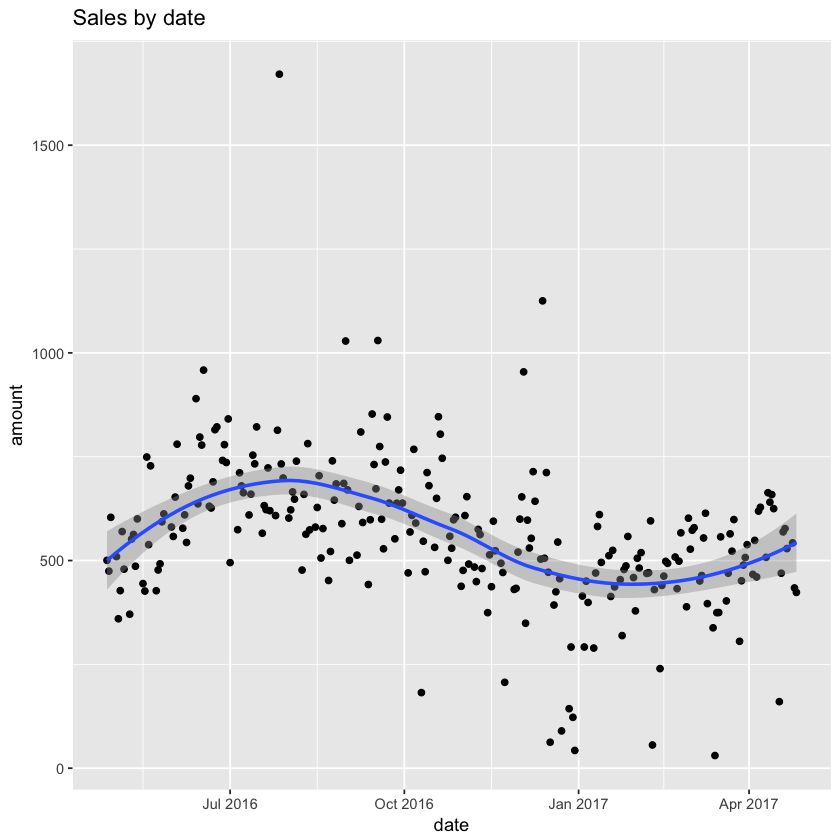

In [19]:
line_plot <- ggplot(df_1, aes(x=date, y=amount)) + geom_point(aes()) + geom_smooth() + 
  ggtitle('Sales by date')
line_plot

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 108 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 108 rows containing missing values (geom_point).”

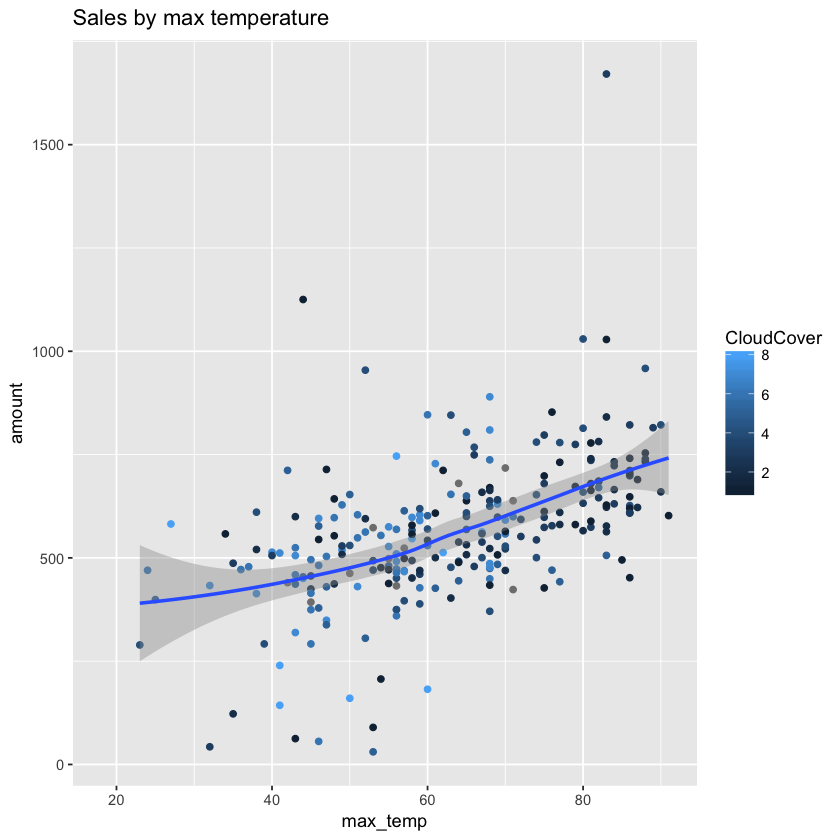

In [14]:
line_plot <- ggplot(df_1, aes(x=max_temp, y=amount)) + geom_point(aes(colour=CloudCover)) + geom_smooth() +
  ggtitle('Sales by max temperature')
line_plot

In [15]:
lm <- lm(amount ~ max_temp, data=df_1)
summary(lm)


Call:
lm(formula = amount ~ max_temp, data = df_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-473.04  -78.93   -6.74   69.46  987.59 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 185.7553    39.7792   4.670 4.88e-06 ***
max_temp      5.9959     0.6159   9.735  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 151.7 on 255 degrees of freedom
  (108 observations deleted due to missingness)
Multiple R-squared:  0.2709,	Adjusted R-squared:  0.2681 
F-statistic: 94.77 on 1 and 255 DF,  p-value: < 2.2e-16


In [16]:
# cor(df_1$amount, df_1$max_temp, na.rm=T )
lm <- lm(amount ~ max_temp + date + CloudCover + log(CloudCover), data=df_1)
summary(lm)


Call:
lm(formula = amount ~ max_temp + date + CloudCover + log(CloudCover), 
    data = df_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-462.51  -83.24   -7.26   72.17  979.31 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2858.3377  2082.6805   1.372    0.171    
max_temp           5.1861     0.8955   5.791 2.17e-08 ***
date              -0.1529     0.1195  -1.279    0.202    
CloudCover       -15.2963    16.6297  -0.920    0.359    
log(CloudCover)   44.3484    51.3816   0.863    0.389    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 154.2 on 241 degrees of freedom
  (119 observations deleted due to missingness)
Multiple R-squared:  0.2752,	Adjusted R-squared:  0.2631 
F-statistic: 22.87 on 4 and 241 DF,  p-value: 4.93e-16


`geom_smooth()` using method = 'loess'
Warning message:
“Removed 108 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 108 rows containing missing values (geom_point).”

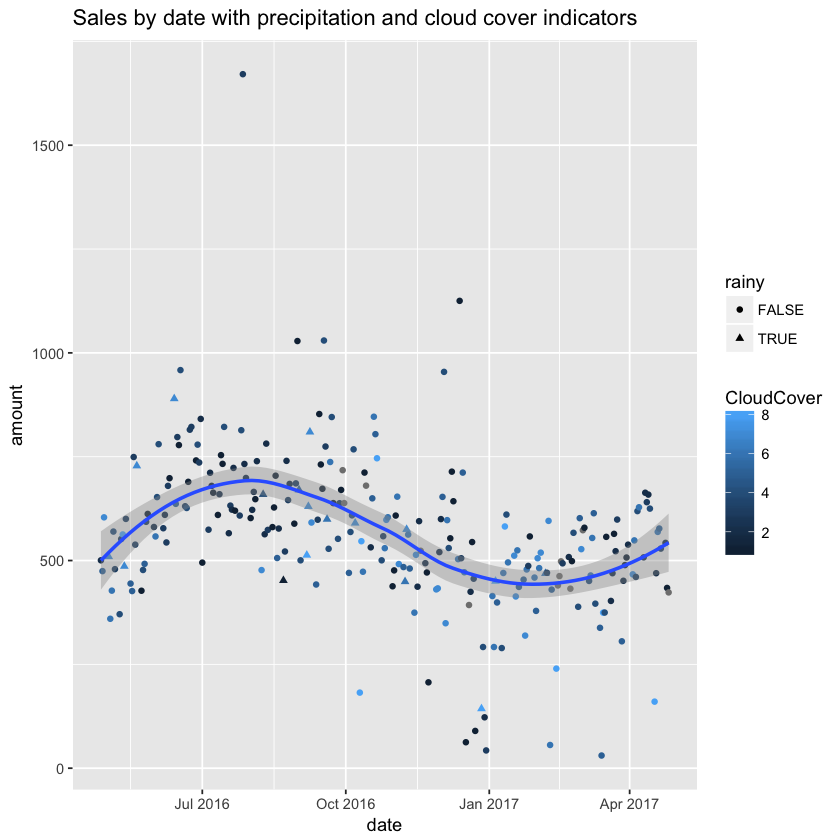

In [20]:
line_plot <- ggplot(df_1, aes(x=date, y=amount)) + geom_point(aes(shape=rainy, colour=CloudCover)) + geom_smooth() + 
  ggtitle('Sales by date with precipitation and cloud cover indicators')
line_plot